In [59]:
# Paso 1: Análisis exploratorio de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [60]:
# Cargar los datos
data = pd.read_csv('D:\\ejercios\\ejercio1\\unidad-5\\wineV2.csv')
data.head()

,clase,alcohol,acido_metalico,Ceniza,alcalinidad_de_la ceniza,magnesio,fenoles_totales,flavonoides,fenoles_no_flavonoides,proantocianidinas,intensidad_de_color,tono,OD280_OD315_de_vinos_diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [61]:
# Mostrar información básica del dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   clase                          178 non-null    int64  
 1   alcohol                        178 non-null    float64
 2   acido_metalico                 178 non-null    float64
 3   Ceniza                         178 non-null    float64
 4   alcalinidad_de_la ceniza       178 non-null    float64
 5   magnesio                       178 non-null    int64  
 6   fenoles_totales                178 non-null    float64
 7   flavonoides                    178 non-null    float64
 8   fenoles_no_flavonoides         178 non-null    float64
 9   proantocianidinas              178 non-null    float64
 10  intensidad_de_color            178 non-null    float64
 11  tono                           178 non-null    float64
 12  OD280_OD315_de_vinos_diluidos  178 non-null    flo

In [62]:
# Estadísticas descriptivas
print(data.describe())

            clase     alcohol  acido_metalico      Ceniza  \
count  178.000000  178.000000      178.000000  178.000000   
mean     1.938202   13.000618        2.336348    2.366517   
std      0.775035    0.811827        1.117146    0.274344   
min      1.000000   11.030000        0.740000    1.360000   
25%      1.000000   12.362500        1.602500    2.210000   
50%      2.000000   13.050000        1.865000    2.360000   
75%      3.000000   13.677500        3.082500    2.557500   
max      3.000000   14.830000        5.800000    3.230000   

       alcalinidad_de_la ceniza    magnesio  fenoles_totales  flavonoides  \
count                178.000000  178.000000       178.000000   178.000000   
mean                  19.494944   99.741573         2.295112     2.029270   
std                    3.339564   14.282484         0.625851     0.998859   
min                   10.600000   70.000000         0.980000     0.340000   
25%                   17.200000   88.000000         1.742500     

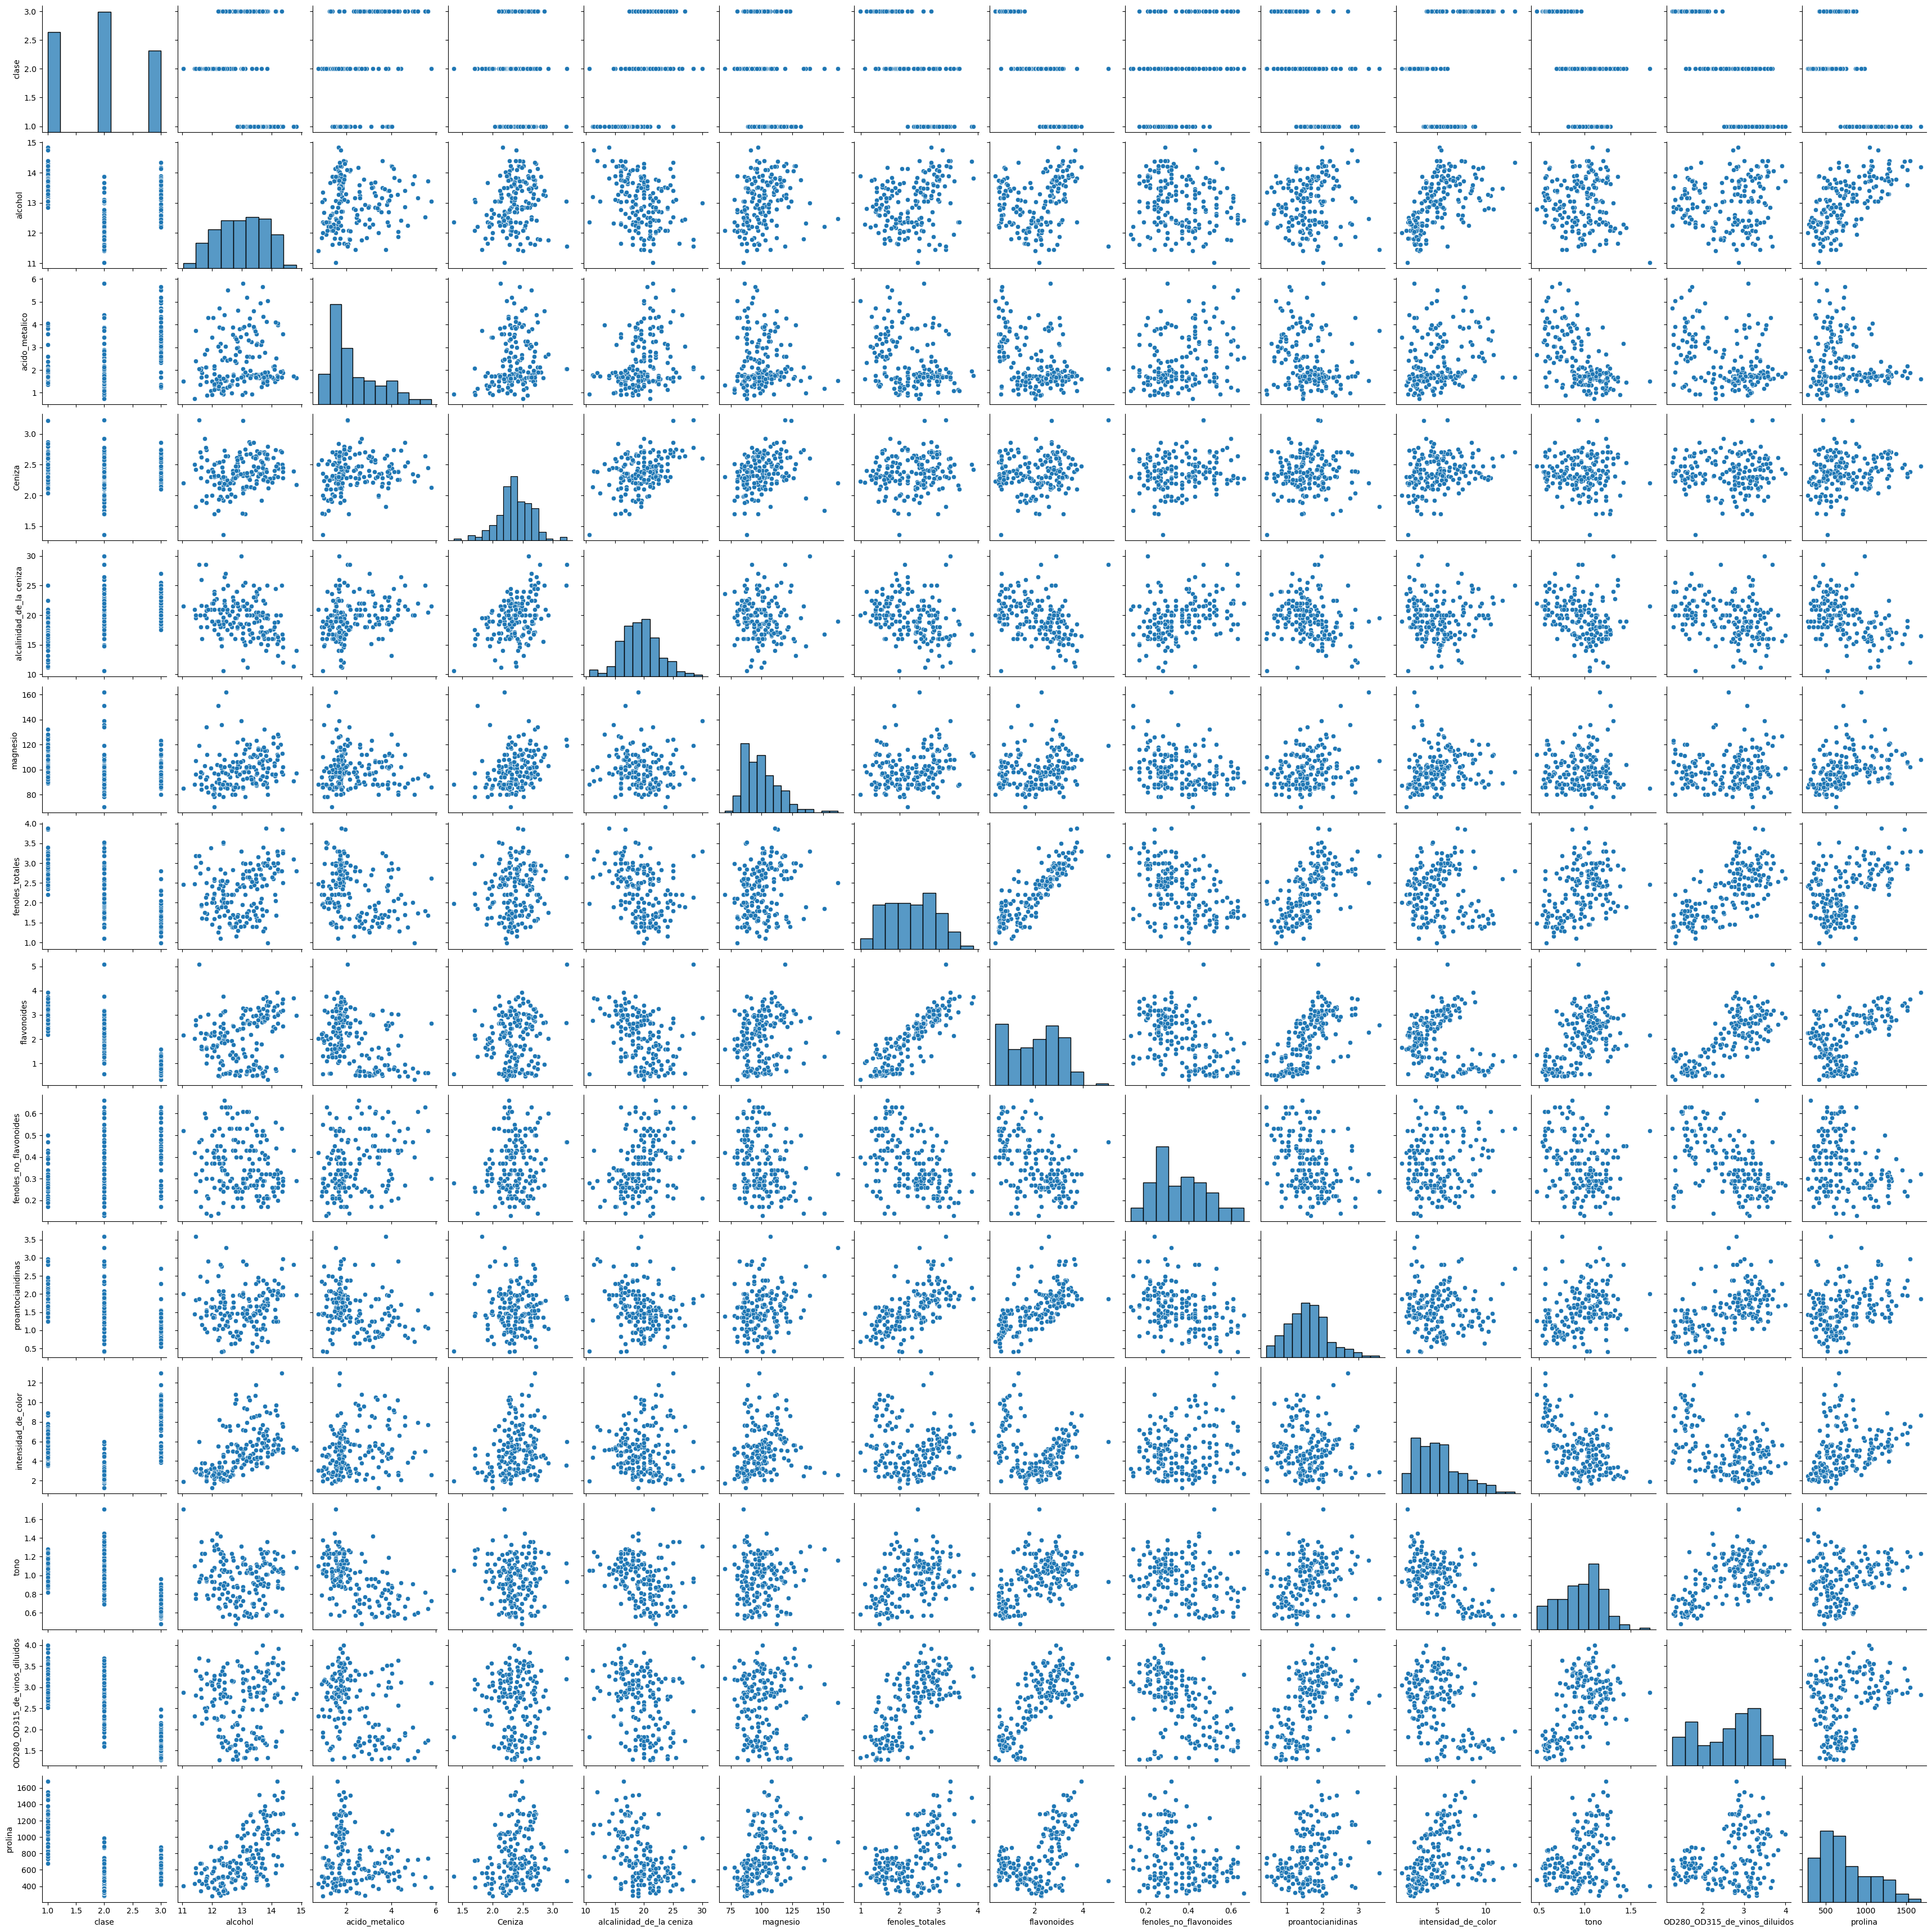

In [63]:
# Visualizar relaciones entre variables
sns.pairplot(data)
plt.show()

In [65]:
# Tratar valores faltantes
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [66]:
# Paso 2: Preprocesamiento de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [67]:
# Transformación de variables si es necesario
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data.columns)

In [68]:
# Paso 3: Selección de características
from sklearn.feature_selection import SelectKBest, f_classif

In [69]:
# Seleccionar las 5 mejores características
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(data_scaled.drop('clase', axis=1), data_scaled['clase'])

In [70]:
# Paso 4: División del dataset en Train y Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, data_scaled['clase'], test_size=0.2, random_state=42)

In [71]:
# Paso 5: Entrenamiento del modelo
from sklearn.tree import DecisionTreeRegressor  # Importamos DecisionTreeRegressor en lugar de DecisionTreeClassifier

# Configurar hiperparámetros y entrenar el modelo
model = DecisionTreeRegressor(max_depth=5)  # Utilizamos DecisionTreeRegressor
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [72]:
# Paso 6: Evaluación del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular predicciones
y_pred = model.predict(X_test)

# Calcular métricas de regresión
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.27903126376045784
Mean Absolute Error: 0.14376711202766326
R-squared: 0.7142857142857143


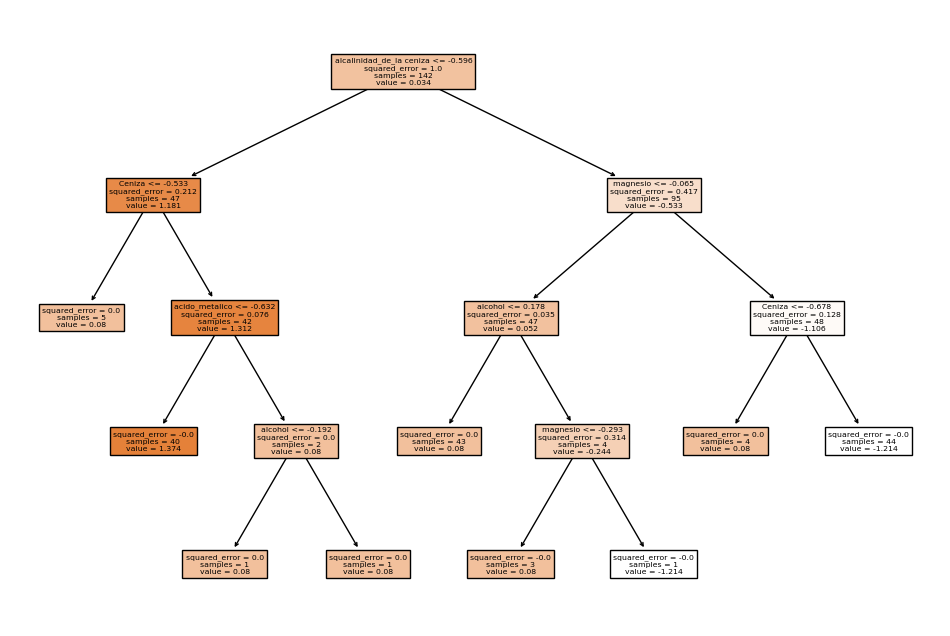

In [73]:
# Paso 7: Visualización de resultados
# Obtener los nombres de las características como una lista
feature_names_list = data_scaled.drop('clase', axis=1).columns.tolist()

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=feature_names_list, class_names=['Clase 0', 'Clase 1'], filled=True)
plt.show()

In [74]:
# Paso 8: Interpretación y documentación de resultados
# Analizar la importancia de las características
feature_importance = model.feature_importances_
print("Importancia de las características:", feature_importance)

Importancia de las características: [0.00269645 0.02245547 0.09100439 0.65055082 0.23329286]
